Library imports

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pycharge as pc

In [83]:
def decide_marker(p):
    if p>0:
        return "$+$"
    elif p<0:
        return "$-$"
    else:
        return "$0$"

Simulating 4 charges for demonstration purposes

In [84]:
plt.rcParams['figure.figsize'] = [15, 5]
source = [
    pc.StationaryCharge(position=(7, 0, 0), q=1),
    pc.StationaryCharge(position=(-7, 0, 0), q=1),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 10
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

Plotting the simulation outcome

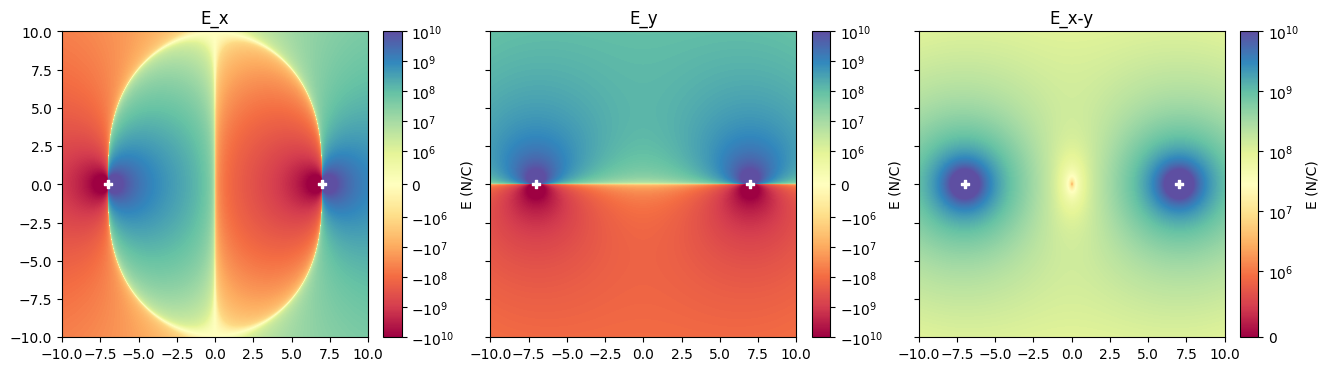

In [85]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e10, vmax=1e10)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=0, vmax=1e10)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-10, 11, 2.5)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)

# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()

Rerunning the demonstration with real numbers based on the radius of average human head


![Huamn head dimensions](Head-dimensions-with-tissues-for-an-adult-four-layered-human-head.png "Average dimensions of a human head")

Simulation

In [86]:
source = [
    pc.StationaryCharge(position=(0, -0.0722, 0), q=0.00001),
    pc.StationaryCharge(position=(0, 0.0722, 0), q=0.00001),
    pc.StationaryCharge(position=(0.0722, 0, 0), q=0.00001),
    pc.StationaryCharge(position=(-0.0722, 0, 0), q=0.00001),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 20e-2
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

Plotting


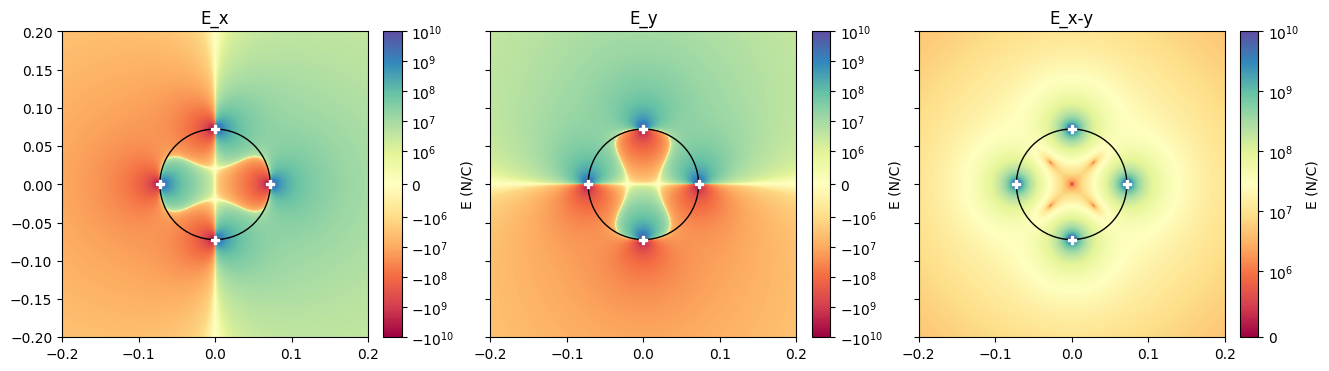

In [87]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e10, vmax=1e10)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=0, vmax=1e10)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-20e-2, 25e-2, 0.1)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

circle1 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle2 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle3 = plt.Circle((0, 0), 7.22e-2, fill=False)
axs[0].add_patch(circle1)
axs[1].add_patch(circle2)
axs[2].add_patch(circle3)

# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)


# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()

Trying different formations 

![Formations explored](Formations.png "Formations")

Formation a:

Simulation 

In [88]:
source = [
    pc.StationaryCharge(position=(0, -0.0722, 0), q=-0.00001),
    pc.StationaryCharge(position=(0, 0.0722, 0), q=0.00001),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 20e-2
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

Plotting

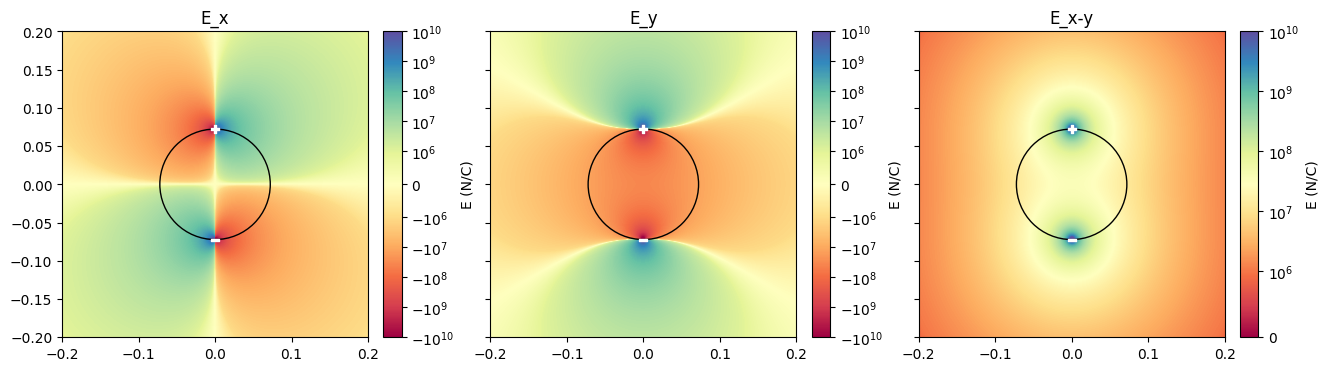

In [89]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e10, vmax=1e10)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=0, vmax=1e10)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-20e-2, 25e-2, 0.1)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

circle1 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle2 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle3 = plt.Circle((0, 0), 7.22e-2, fill=False)
axs[0].add_patch(circle1)
axs[1].add_patch(circle2)
axs[2].add_patch(circle3)
# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)


# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()

formation b:

Simulation

In [90]:
source = [
    pc.StationaryCharge(position=(0.04, -0.06, 0), q=-0.00001),
    pc.StationaryCharge(position=(0.04, 0.06, 0), q=0.00001),
    pc.StationaryCharge(position=(-0.04, 0.06, 0), q=0.00001),
    pc.StationaryCharge(position=(-0.04, -0.06, 0), q=-0.00001),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 20e-2
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

Plotting

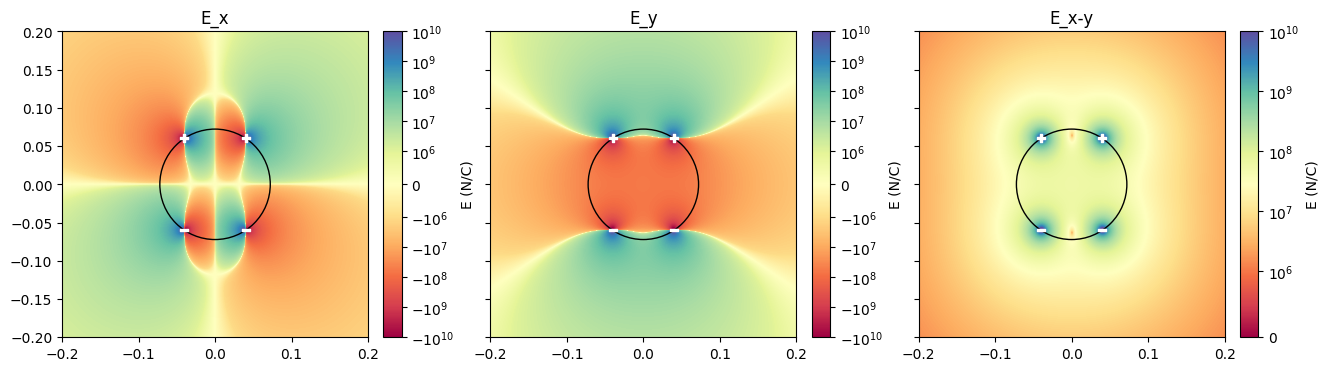

In [91]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e10, vmax=1e10)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=0, vmax=1e10)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-20e-2, 25e-2, 0.1)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

circle1 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle2 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle3 = plt.Circle((0, 0), 7.22e-2, fill=False)
axs[0].add_patch(circle1)
axs[1].add_patch(circle2)
axs[2].add_patch(circle3)
# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)


# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()

Formation c

Simulation

In [92]:
source = [
    pc.StationaryCharge(position=(0.04, -0.0722, 0), q=-0.00001),
    pc.StationaryCharge(position=(0.04, 0.0722, 0), q=0.00001),
    pc.StationaryCharge(position=(-0.04, 0.0722, 0), q=0.00001),
    pc.StationaryCharge(position=(-0.04, -0.0722, 0), q=-0.00001),
    pc.StationaryCharge(position=(0, -0.0722, 0), q=-0.00001),
    pc.StationaryCharge(position=(0, 0.0722, 0), q=0.00001),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 20e-2
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

Plotting

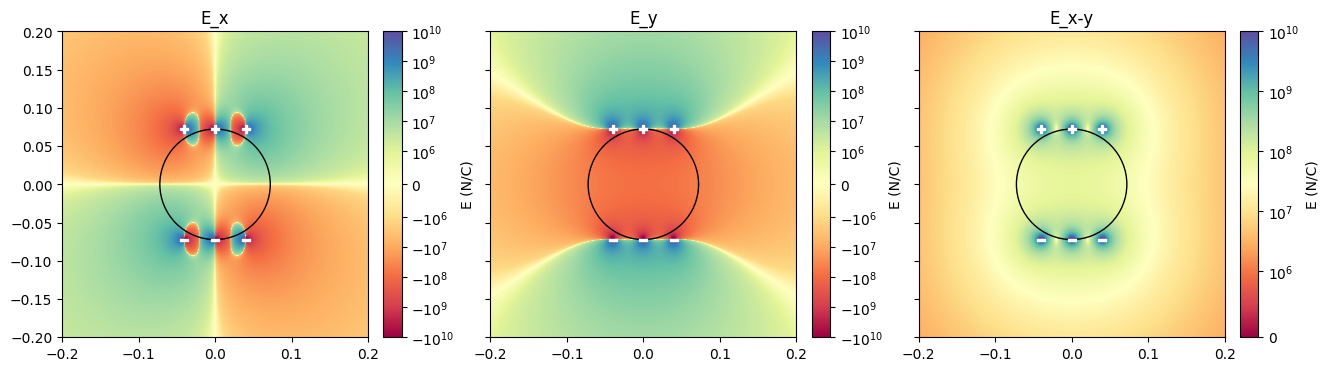

In [93]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e10, vmax=1e10)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=0, vmax=1e10)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-20e-2, 25e-2, 0.1)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

circle1 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle2 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle3 = plt.Circle((0, 0), 7.22e-2, fill=False)
axs[0].add_patch(circle1)
axs[1].add_patch(circle2)
axs[2].add_patch(circle3)
# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)


# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()

Fomation c *fitted 

Simulation

In [94]:
source = [
    pc.StationaryCharge(position=(0.04, -0.06, 0), q=-0.00001),
    pc.StationaryCharge(position=(0.04, 0.06, 0), q=0.00001),
    pc.StationaryCharge(position=(-0.04, 0.06, 0), q=0.00001),
    pc.StationaryCharge(position=(-0.04, -0.06, 0), q=-0.00001),
    pc.StationaryCharge(position=(0, -0.0722, 0), q=-0.00001),
    pc.StationaryCharge(position=(0, 0.0722, 0), q=0.00001),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 20e-2
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

Plotting

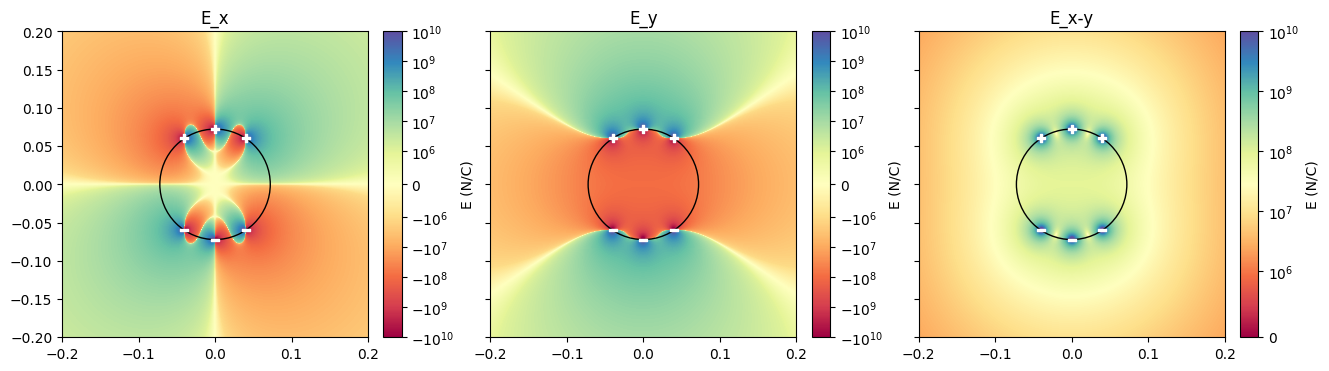

In [95]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e10, vmax=1e10)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=0, vmax=1e10)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-20e-2, 25e-2, 0.1)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

circle1 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle2 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle3 = plt.Circle((0, 0), 7.22e-2, fill=False)
axs[0].add_patch(circle1)
axs[1].add_patch(circle2)
axs[2].add_patch(circle3)
# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)


# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()

Formation E

Simulation

In [96]:
source = [
    pc.StationaryCharge(position=(0.04, -0.06, 0), q=-0.00001),
    pc.StationaryCharge(position=(0.04, 0.06, 0), q=-0.00001),
    pc.StationaryCharge(position=(-0.04, 0.06, 0), q=0.00001),
    pc.StationaryCharge(position=(-0.04, -0.06, 0), q=0.00001),
    pc.StationaryCharge(position=(-0.0722, 0, 0), q=0.00001),
    pc.StationaryCharge(position=(0.0722, 0, 0), q=-0.00001),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 20e-2
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

Plotting

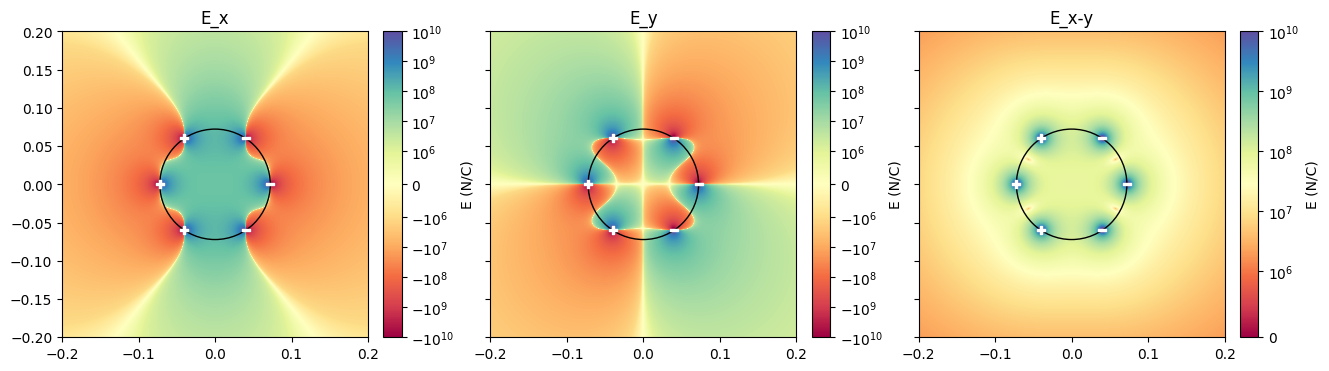

In [97]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e10, vmax=1e10)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=0, vmax=1e10)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-20e-2, 25e-2, 0.1)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

circle1 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle2 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle3 = plt.Circle((0, 0), 7.22e-2, fill=False)
axs[0].add_patch(circle1)
axs[1].add_patch(circle2)
axs[2].add_patch(circle3)
# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)


# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()

Formation F

Simulation

In [98]:
source = [
    pc.StationaryCharge(position=(0.04, -0.06, 0), q=-0.00001),
    pc.StationaryCharge(position=(0.04, 0.06, 0), q=-0.00001),
    pc.StationaryCharge(position=(-0.04, 0.06, 0), q=0.00001),
    pc.StationaryCharge(position=(-0.04, -0.06, 0), q=0.00001),
    pc.StationaryCharge(position=(-0.0722, 0, 0), q=-0.00001),
    pc.StationaryCharge(position=(0.0722, 0, 0), q=0.00001),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 20e-2
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

Plotting

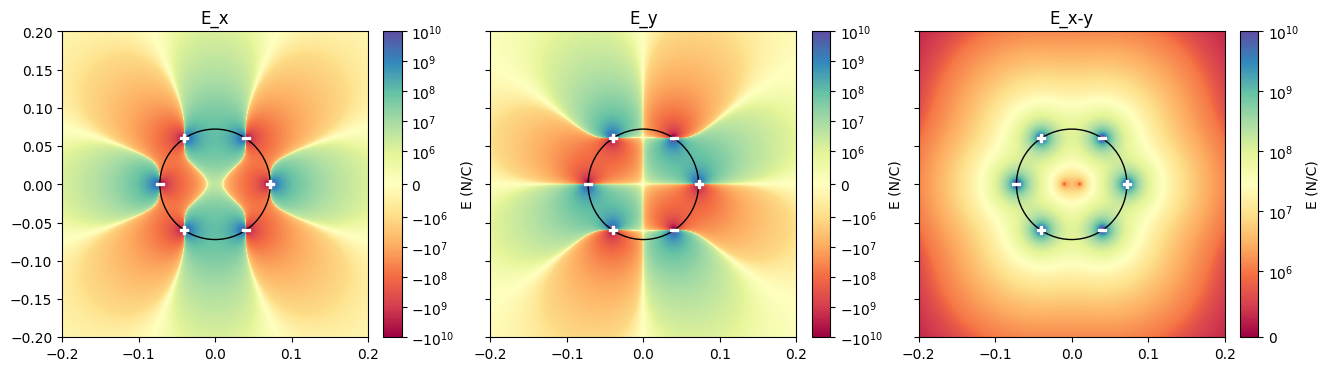

In [99]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e10, vmax=1e10)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=0, vmax=1e10)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-20e-2, 25e-2, 0.1)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

circle1 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle2 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle3 = plt.Circle((0, 0), 7.22e-2, fill=False)
axs[0].add_patch(circle1)
axs[1].add_patch(circle2)
axs[2].add_patch(circle3)
# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)


# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()

Expereminting with formations b & c

In [100]:
source = [
    pc.StationaryCharge(position=(0.04, -0.2722, 0), q=-0.000000001),
    pc.StationaryCharge(position=(0.04, 0.2722, 0), q=0.000000001),
    pc.StationaryCharge(position=(-0.04, 0.2722, 0), q=0.000000001),
    pc.StationaryCharge(position=(-0.04, -0.2722, 0), q=-0.000000001),
    pc.StationaryCharge(position=(0, -0.2722, 0), q=-0.000000001),
    pc.StationaryCharge(position=(0, 0.2722, 0), q=0.000000001),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 30e-2
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

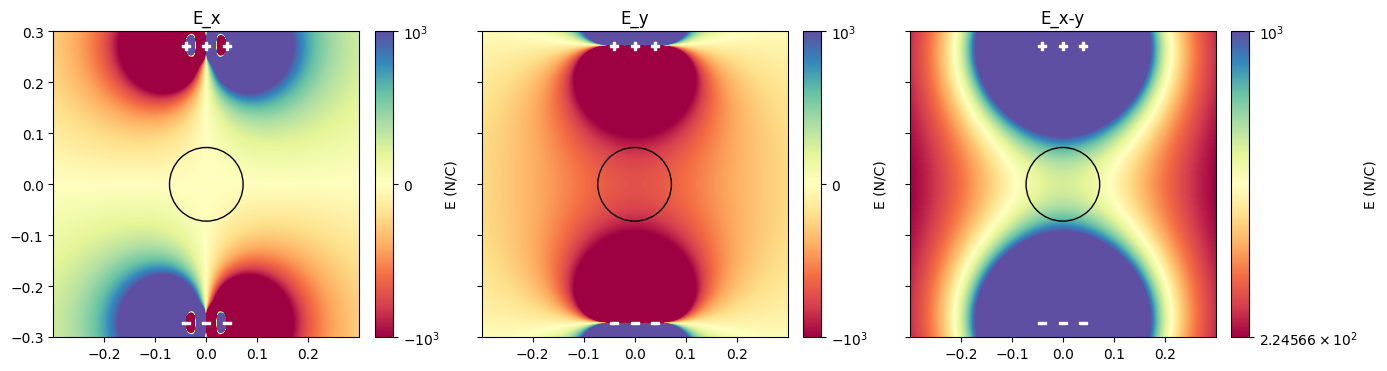

In [101]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e3, vmax=1e3)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=comb.min(), vmax=1e3)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-20e-2, 25e-2, 0.1)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

circle1 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle2 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle3 = plt.Circle((0, 0), 7.22e-2, fill=False)
axs[0].add_patch(circle1)
axs[1].add_patch(circle2)
axs[2].add_patch(circle3)
# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)


# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()

In [102]:
source = [
    pc.StationaryCharge(position=(0.04, 0.3722, 0), q=0.000000001),
    pc.StationaryCharge(position=(-0.04, 0.3722, 0), q=0.000000001),
    pc.StationaryCharge(position=(0, -0.2722, 0), q=-0.000000001),
    pc.StationaryCharge(position=(0, 0.3722, 0), q=0.000000001),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 40e-2
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

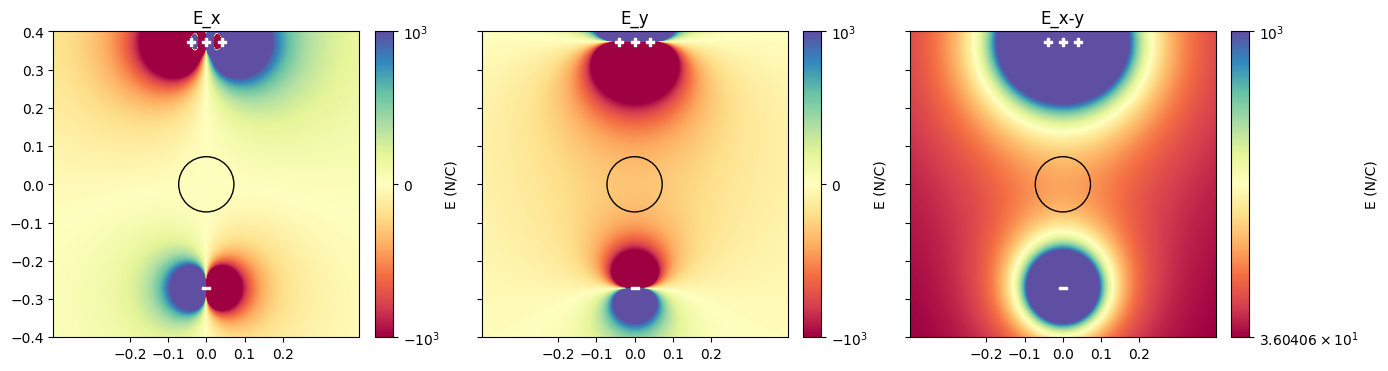

In [103]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e3, vmax=1e3)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=comb.min(), vmax=1e3)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-20e-2, 25e-2, 0.1)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

circle1 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle2 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle3 = plt.Circle((0, 0), 7.22e-2, fill=False)
axs[0].add_patch(circle1)
axs[1].add_patch(circle2)
axs[2].add_patch(circle3)
# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)


# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()

In [104]:
source = [
    pc.StationaryCharge(position=(0.03, -0.36, 0), q=-0.000000001),
    pc.StationaryCharge(position=(0.03, 0.36, 0), q=0.000000001),
    pc.StationaryCharge(position=(-0.03, 0.36, 0), q=0.000000001),
    pc.StationaryCharge(position=(-0.03, -0.36, 0), q=-0.000000001),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 40e-2
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

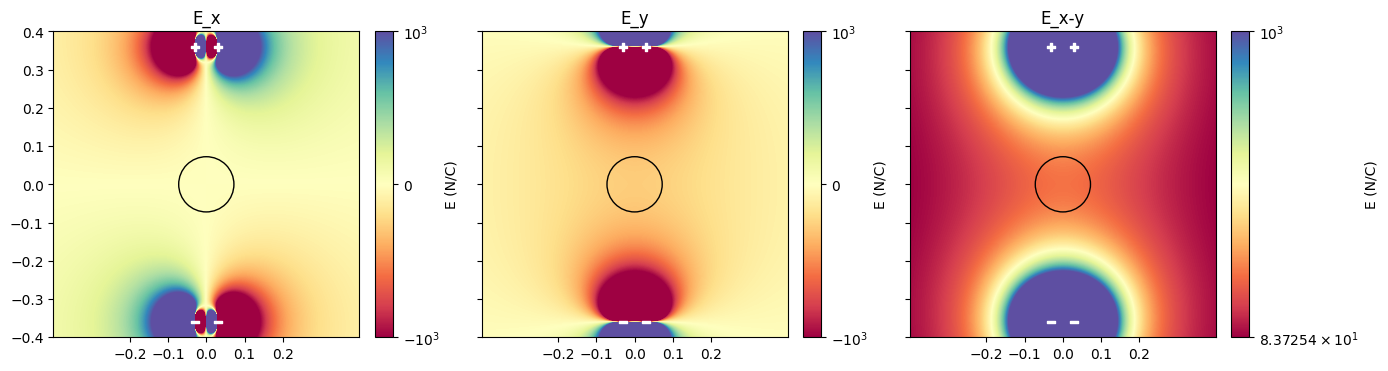

In [105]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e3, vmax=1e3)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=comb.min(), vmax=1e3)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-20e-2, 25e-2, 0.1)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

circle1 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle2 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle3 = plt.Circle((0, 0), 7.22e-2, fill=False)
axs[0].add_patch(circle1)
axs[1].add_patch(circle2)
axs[2].add_patch(circle3)
# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)


# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()

In [106]:
source = [
    pc.StationaryCharge(position=(0.03, 0.36, 0), q=0.000000001),
    pc.StationaryCharge(position=(-0.03, 0.36, 0), q=0.000000001),
    pc.StationaryCharge(position=(0, -0.2722, 0), q=-0.000000001),
]
simulation = pc.Simulation(source)

# Create meshgrid in x-y plane between -10 m to 10 m at z=0
lim = 40e-2
npoints = 1000  # Number of grid points
coordinates = np.linspace(-lim, lim, npoints)  # grid from -lim to lim
x, y, z = np.meshgrid(coordinates, coordinates, 0, indexing="xy")  # z=0

# Calculate E field components at t=0
E_x, E_y, E_z = simulation.calculate_E(t=0, x=x, y=y, z=z)
# Plot E_x, E_y, and E_z fields
E_x_plane = E_x[:, :, 0]  # Create 2D array at z=0 for plotting
E_y_plane = E_y[:, :, 0]
E_z_plane = E_z[:, :, 0]
comb = np.sqrt(E_x_plane**2 + E_y_plane**2)

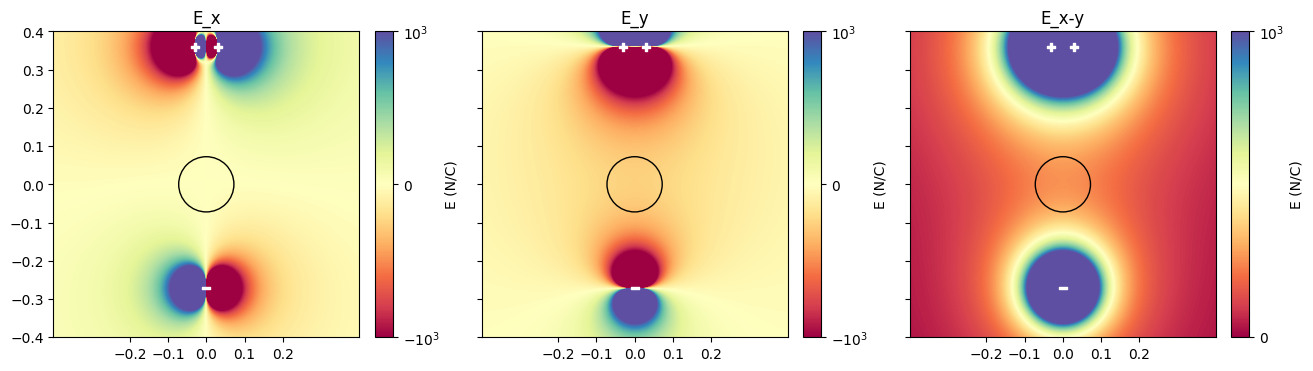

In [107]:
# Create figs and axes, plot E components on log scale
fig, axs = plt.subplots(1, 3, sharey=True)
norm1 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=-1e3, vmax=1e3)
norm2 = mpl.colors.SymLogNorm(linthresh=1.01e6, linscale=1, vmin=0, vmax=1e3)
extent = [-lim, lim, -lim, lim]
plt.set_cmap("Spectral")
im_0 = axs[0].imshow(E_x_plane, origin="lower", norm=norm1, extent=extent)
im_1 = axs[1].imshow(E_y_plane, origin="lower", norm=norm1, extent=extent)
im_2 = axs[2].imshow(comb, origin="lower", norm=norm2, extent=extent)

xticks = np.arange(-20e-2, 25e-2, 0.1)
axs[0].set_xticks(xticks)
axs[1].set_xticks(xticks)
axs[2].set_xticks(xticks)
# Add labels

axs[0].set_title("E_x")
axs[1].set_title("E_y")
axs[2].set_title("E_x-y")

circle1 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle2 = plt.Circle((0, 0), 7.22e-2, fill=False)
circle3 = plt.Circle((0, 0), 7.22e-2, fill=False)
axs[0].add_patch(circle1)
axs[1].add_patch(circle2)
axs[2].add_patch(circle3)
# Add point positions to plot
for point in source:
    marker = decide_marker(point.q)
    axs[0].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[1].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)
    axs[2].scatter(point.position[0], point.position[1], c="white", s=35,marker=marker)


# Add colorbar to figure
Ecax0 = inset_axes(
    axs[0],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[0].transAxes,
    borderpad=0,
)

Ecax1 = inset_axes(
    axs[1],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[1].transAxes,
    borderpad=0,
)
Ecax2 = inset_axes(
    axs[2],
    width="6%",
    height="100%",
    loc="lower left",
    bbox_to_anchor=(1.05, 0.0, 1, 1),
    bbox_transform=axs[2].transAxes,
    borderpad=0,
)

E_cbar_0 = plt.colorbar(im_0, ax=axs[0], label="E (N/C)", cax=Ecax0)
E_cbar_1 = plt.colorbar(im_1, ax=axs[1], label="E (N/C)", cax=Ecax1)
E_cbar_2 = plt.colorbar(im_2, ax=axs[2], label="E (N/C)", cax=Ecax2)

plt.subplots_adjust(wspace=0.4)

plt.show()